# Import library utama

```
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install scipy
```

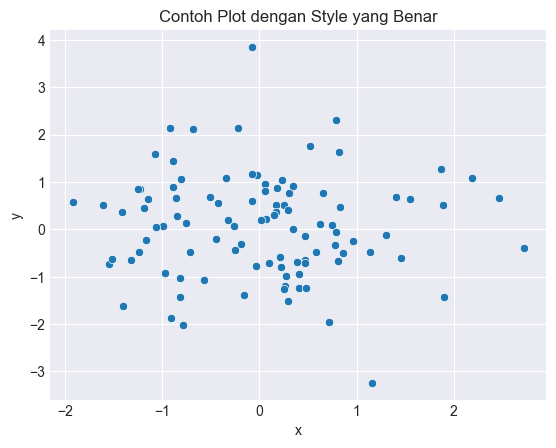

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Konfigurasi tampilan
pd.set_option('display.max_columns', 50)
%matplotlib inline

# PILIH SALAH SATU:
# sns.set_theme(style="darkgrid")  # Opsi terbaik
plt.style.use('seaborn-v0_8-darkgrid')  # Alternatif

# Contoh plot untuk test
data = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
sns.scatterplot(data=data, x='x', y='y')
plt.title('Contoh Plot dengan Style yang Benar')
plt.show()

# Data Simulasi Tren Pencarian PER 2020-2023

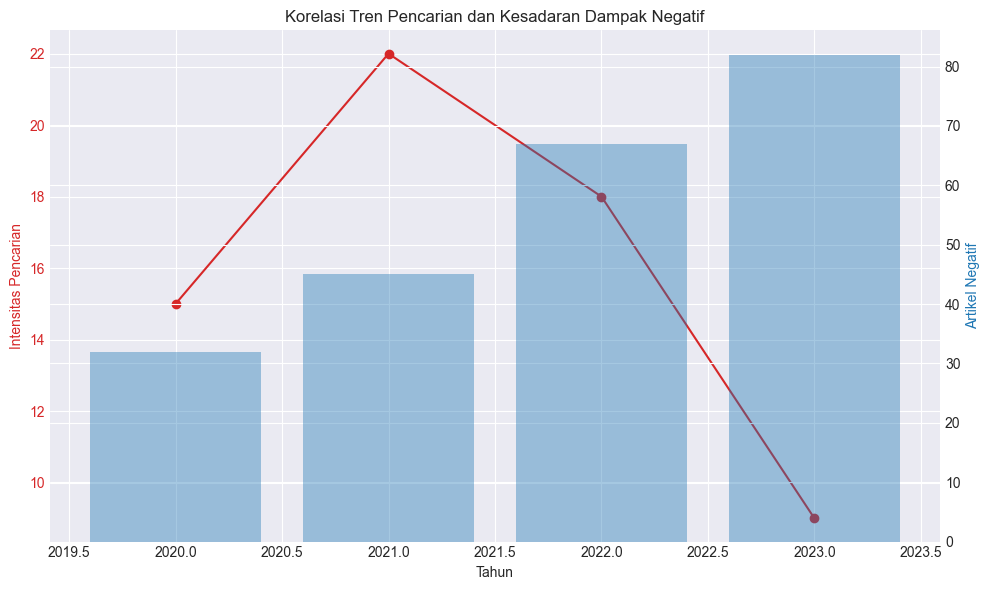

In [15]:
data = {
    'Tahun': [2020, 2021, 2022, 2023],
    'Pencarian_Judi': [15, 22, 18, 9],  # Angka relatif
    'Artikel_Negatif': [32, 45, 67, 82]  # Jumlah artikel dampak negatif
}

df = pd.DataFrame(data)
df['Persentase_Penurunan'] = (df['Pencarian_Judi'] - df['Pencarian_Judi'].shift(1)) / df['Pencarian_Judi'].shift(1) * 100

# Visualisasi
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Intensitas Pencarian', color=color)
ax1.plot(df['Tahun'], df['Pencarian_Judi'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Artikel Negatif', color=color)
ax2.bar(df['Tahun'], df['Artikel_Negatif'], color=color, alpha=0.4)

plt.title('Korelasi Tren Pencarian dan Kesadaran Dampak Negatif')
fig.tight_layout()
plt.show()

# Analisis Sentimen dari Data teks

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\freef\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Text  Polarity  Subjectivity  \
0  Judi online menyebabkan kerugian materi hingga...       0.0           0.0   
1  Bareskrim menangkap 12 bandar judi online di S...       0.0           0.0   
2  Pakar: Judi online kini menyasar generasi muda...      -0.4           0.4   
3  Kominfo blokir 1.234 situs judi online sepanja...       0.0           0.0   

     Label  
0  Positif  
1  Positif  
2  Negatif  
3  Positif  


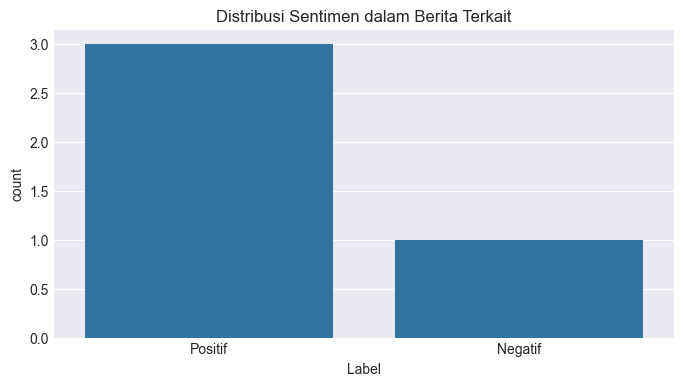

In [16]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Contoh data teks simulasi (dari berita)
sample_texts = [
    "Judi online menyebabkan kerugian materi hingga Rp 2,1 triliun di Jawa Barat",
    "Bareskrim menangkap 12 bandar judi online di Surabaya",
    "Pakar: Judi online kini menyasar generasi muda melalui game",
    "Kominfo blokir 1.234 situs judi online sepanjang 2023"
]

# Hitung sentimen
results = []
for text in sample_texts:
    analysis = TextBlob(text)
    results.append({
        'Text': text,
        'Polarity': analysis.sentiment.polarity,
        'Subjectivity': analysis.sentiment.subjectivity,
        'Label': 'Negatif' if analysis.sentiment.polarity < 0 else 'Positif'
    })

sentiment_df = pd.DataFrame(results)
print(sentiment_df)

# Visualisasi
plt.figure(figsize=(8,4))
sns.countplot(x='Label', data=sentiment_df)
plt.title('Distribusi Sentimen dalam Berita Terkait')
plt.show()

# Analisis Statistik Deskriptif

Pada bagian ini kita akan generate data simulasi usia korban secara random, seberapa sering dan seberapa bayak yang memainkan judi online di setiap usia

             Usia
count  100.000000
mean    23.980000
std      4.456252
min     15.000000
25%     21.000000
50%     24.000000
75%     26.250000
max     34.000000


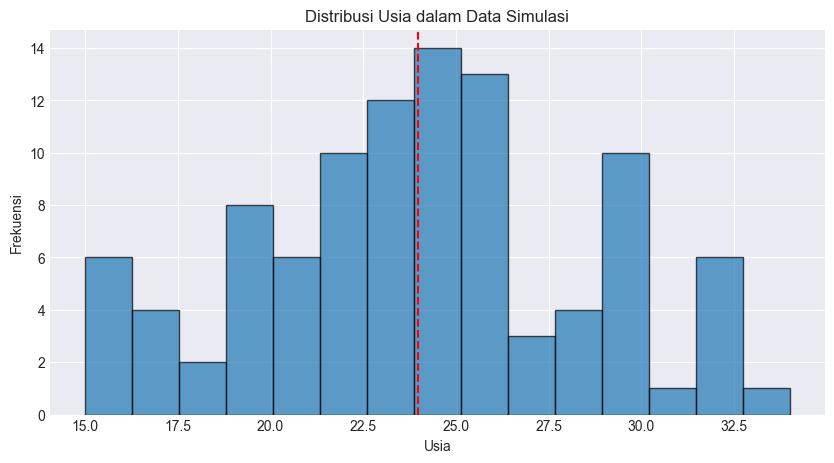

In [17]:
# Generate data simulasi usia korban (random)
np.random.seed(42)
ages = np.random.normal(loc=25, scale=5, size=100).astype(int)
ages = np.clip(ages, 15, 60)  # Batasi rentang usia

# Buat DataFrame
age_df = pd.DataFrame(ages, columns=['Usia'])

# Analisis deskriptif
print(age_df.describe())

# Visualisasi distribusi
plt.figure(figsize=(10,5))
plt.hist(age_df['Usia'], bins=15, edgecolor='k', alpha=0.7)
plt.axvline(age_df['Usia'].mean(), color='r', linestyle='--')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia dalam Data Simulasi')
plt.show()

# Korelasi antara variabel


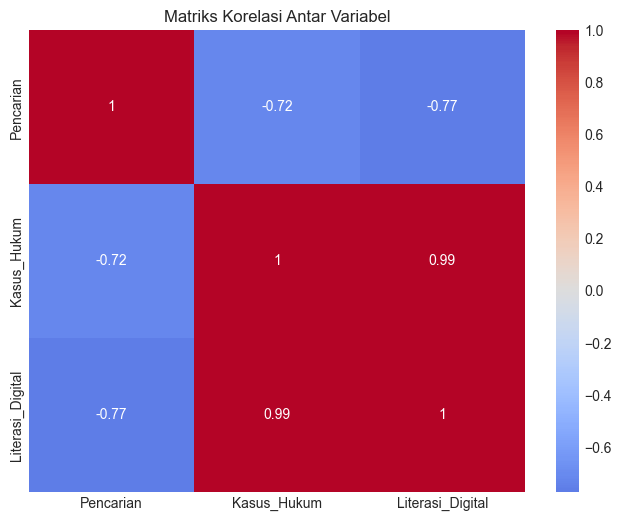

In [18]:
# Data simulasi
corr_data = pd.DataFrame({
    'Pencarian': [15, 22, 18, 9, 5],
    'Kasus_Hukum': [3, 7, 12, 15, 18],
    'Literasi_Digital': [45, 52, 60, 68, 75]
})

# Hitung korelasi
correlation = corr_data.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

In [19]:
import os

# Buat folder jika belum ada
output_dir = "hasil_visualisasi"
os.makedirs(output_dir, exist_ok=True)

# Contoh visualisasi 1: Tren Pencarian
plt.figure(figsize=(10,6))
df['Pencarian_Judi'].plot(title='Tren Pencarian Judi Online')
plt.ylabel('Intensitas Pencarian')
plt.tight_layout()
plt.savefig(f'{output_dir}/tren_pencarian.png', dpi=300, bbox_inches='tight')
plt.close()

# Contoh visualisasi 2: Distribusi Usia
plt.figure(figsize=(10,6))
sns.histplot(age_df['Usia'], bins=15, kde=True)
plt.title('Distribusi Usia')
plt.savefig(f'{output_dir}/distribusi_usia.png', dpi=300, bbox_inches='tight')
plt.close()

# Contoh visualisasi 3: Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel')
plt.savefig(f'{output_dir}/heatmap_korelasi.png', dpi=300, bbox_inches='tight')
plt.close()